In [1]:
# pip install webdriver_manager, selenium
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

options = Options()
# chỉ chạy đoạn này nếu đã cài đặt Chrome-driver về máy cá nhân
driver = webdriver.Chrome(r"C:\Users\Admin\Downloads\chromedriver_win32\chromedriver.exe")
# có thể thay thế bằng
# options = Options()
# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14064\2970595778.py:11: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"C:\Users\Admin\Downloads\chromedriver_win32\chromedriver.exe")


In [2]:
driver.get("https://shopee.vn/daily_discover?pageNumber=1")

#### Scroll down hết màn hình

In [3]:
import time
for n_time in range(10):
    time.sleep(1)
    driver.execute_script("window.scrollTo(0, 1080)")

#### 1. Crawl item names

In [4]:
list_items = [x.text for x in driver.find_elements(By.CLASS_NAME, "dpiR4u")]
list_items

['Dép lông con sóc siêu cute xả khokho85k-85k sập giá\n#Shopdacbiet\n#ShopXuHuong',
 'Loa bluetooth mini không dây,nghe nhạc,giá rẻ,công nghệ blutooth 5.0 BINTECH\n#ShopXuHuong',
 'Áo thun LV 02 in chữ Luois.Vuitton LV Decal Trắng Đen tay lỡ form rộng Vải Cotton dành cho nam nữ\n#Shopdacbiet\n#ShopXuHuong',
 'Dép nam nữ quai ngang dập chìm gucici hót 2023 size 38-43\n#Shopdacbiet\n#ShopXuHuong',
 'Gương trang điểm 2 mặt để bàn xinh xắn xoay 360 độ nhiều mẫu\nHome Club giảm 3%',
 'BÁNH TRÁNG PHƠI SƯơNG MỀM DẺO KÈM MUỐI TÉP HÀNH + BƠ (250g bánh tráng)\n#Shopdacbiet\n#ShopXuHuong',
 'Dép nhựa quai ngang DO siêu đẹp 5cm\n#Shopdacbiet\n#ShopXuHuong',
 'Tai Nghe Bluetooth M10 Pro Tai Nghe Không M10 Pro Phiên Bản Nâng Cấp Pin Trâu, Nút Cảm Ứng Tự Động Kết Nối - BINTECH\n#ShopXuHuong',
 '[Mã FATREND1104 giảm đến 30k đơn 99k] ÁO CARDIGAN, ÁO KHOÁC Nữ Form Rộng Viền Túi Đen Trắng',
 '[Mã FATREND1104 giảm đến 30k đơn 99k] Tee basic ss1 CREWZ áo thun tay lỡ unisex Local Brand -Lamo Store(V427)\n10

#### 2. Price

In [5]:
list_prices = [x.text for x in driver.find_elements(By.CLASS_NAME, "juCMSo")]
list_prices

['85.000',
 '60.000',
 '99.000',
 '84.000',
 '39.000',
 '59.000',
 '60.000',
 '125.000',
 '59.000',
 '95.000',
 '39.000',
 '72.900',
 '86.000',
 '99.000',
 '13.800',
 '69.000',
 '89.000',
 '25.000',
 '95.000',
 '3.500',
 '66.000',
 '55.000',
 '85.000',
 '59.000',
 '4.500',
 '69.000',
 '65.000',
 '15.000',
 '85.000',
 '75.000',
 '69.500',
 '79.000',
 '1.000',
 '3.200',
 '29.000',
 '99.000',
 '45.000',
 '79.800',
 '26.000',
 '99.000',
 '95.000',
 '19.000',
 '65.000',
 '39.000',
 '13.000',
 '85.000',
 '69.900',
 '99.000']

#### 3. Number of sold (doanh số đã bán)

In [6]:
[x.text for x in driver.find_elements(By.CLASS_NAME, 'r6HknA dQAXj1')]

[]

#### Notes
Tuy nhiên, để lấy được trường thông tin "số lượng đã bán" từ class `r6HknA dQAXj1` thì có lỗi xảy ra, do đó ta sẽ crawl toàn bộ khung chứa tất cả thông tin gồm `tên sản phẩm - giá - số lượng` với class `'KMyn8J'`

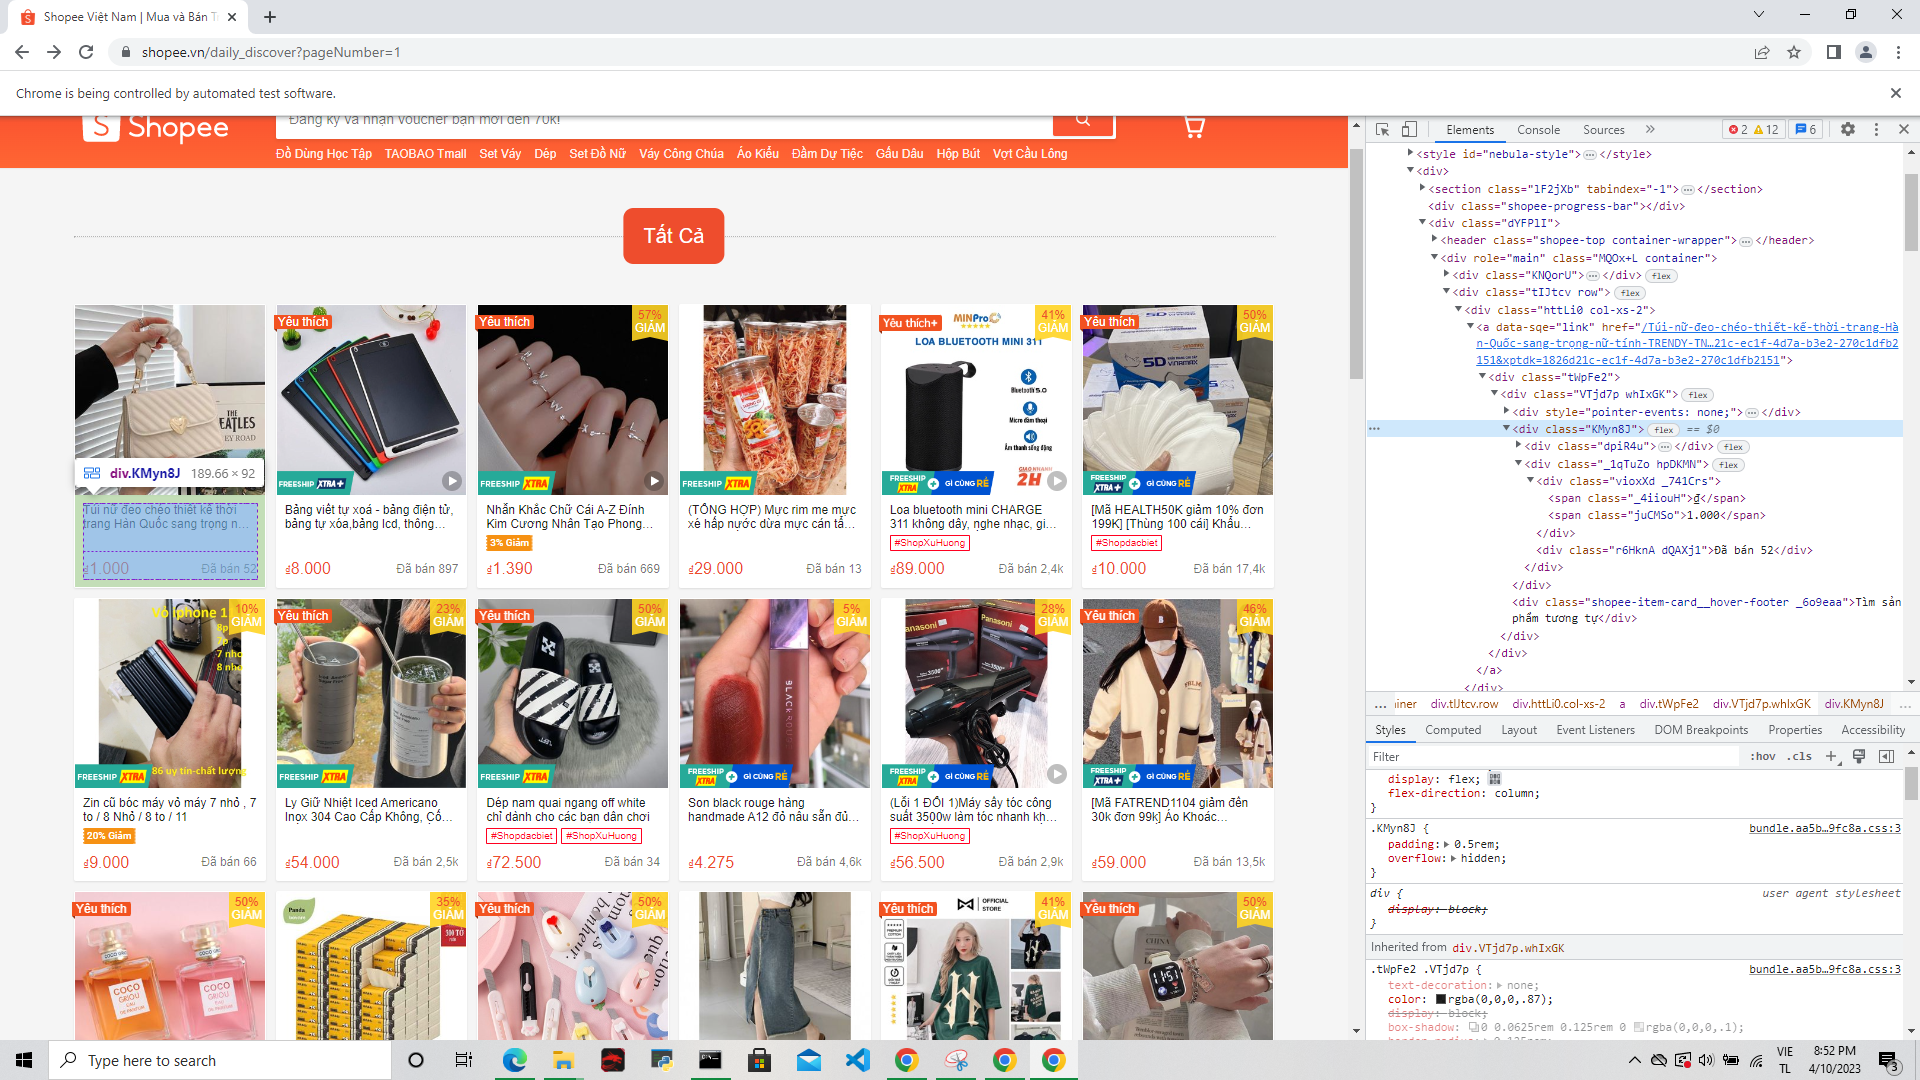

In [7]:
all_info = [x.text for x in driver.find_elements(By.CLASS_NAME, 'KMyn8J')]
all_info

['Dép lông con sóc siêu cute xả khokho85k-85k sập giá\n#Shopdacbiet\n#ShopXuHuong\n₫85.000\nĐã bán 5,2k',
 'Loa bluetooth mini không dây,nghe nhạc,giá rẻ,công nghệ blutooth 5.0 BINTECH\n#ShopXuHuong\n₫60.000\nĐã bán 5,7k',
 'Áo thun LV 02 in chữ Luois.Vuitton LV Decal Trắng Đen tay lỡ form rộng Vải Cotton dành cho nam nữ\n#Shopdacbiet\n#ShopXuHuong\n₫99.000\nĐã bán 4k',
 'Dép nam nữ quai ngang dập chìm gucici hót 2023 size 38-43\n#Shopdacbiet\n#ShopXuHuong\n₫84.000\nĐã bán 1,8k',
 'Gương trang điểm 2 mặt để bàn xinh xắn xoay 360 độ nhiều mẫu\nHome Club giảm 3%\n₫39.000\nĐã bán 14,8k',
 'BÁNH TRÁNG PHƠI SƯơNG MỀM DẺO KÈM MUỐI TÉP HÀNH + BƠ (250g bánh tráng)\n#Shopdacbiet\n#ShopXuHuong\n₫59.000\nĐã bán 13,2k',
 'Dép nhựa quai ngang DO siêu đẹp 5cm\n#Shopdacbiet\n#ShopXuHuong\n₫60.000\nĐã bán 4,8k',
 'Tai Nghe Bluetooth M10 Pro Tai Nghe Không M10 Pro Phiên Bản Nâng Cấp Pin Trâu, Nút Cảm Ứng Tự Động Kết Nối - BINTECH\n#ShopXuHuong\n₫125.000\nĐã bán 3,4k',
 '[Mã FATREND1104 giảm đến 30k đơn

#### Comment
Như vậy, lúc này mỗi dòng (trong `all_info`) chứa thông tin về các nhóm `item_name - tag - price - n_solds` và chúng được cách với nhau bởi dấu xuống dòng `\n`

Do đó, ta sẽ thiết lập lại code cho chúng như sau

In [8]:
items = []
tags = []
prices = []
n_solds = []
for row in all_info:
    row_split = row.split('\n')
    n_elm_row = len(row_split)
    items.append(row_split[0]) # phần tử đầu tiên
    prices.append(row_split[-2]) # phần tử thứ hai bên phải sang
    n_solds.append(row_split[-1]) # phần tử cuối cùng
    if n_elm_row == 4:
        tags.append(row_split[1])
    else:
        tags.append(''.join(row_split[1:-2]))
tags

['#Shopdacbiet#ShopXuHuong',
 '#ShopXuHuong',
 '#Shopdacbiet#ShopXuHuong',
 '#Shopdacbiet#ShopXuHuong',
 'Home Club giảm 3%',
 '#Shopdacbiet#ShopXuHuong',
 '#Shopdacbiet#ShopXuHuong',
 '#ShopXuHuong',
 '',
 '10% Giảm',
 '#Shopdacbiet#ShopXuHuong',
 '#ShopXuHuong',
 'Giảm ₫5k#ShopXuHuong',
 '#ShopXuHuong',
 '',
 '#Shopdacbiet',
 '#Shopdacbiet#ShopXuHuong',
 '',
 'Giảm ₫10k#Shopdacbiet',
 '',
 '#ShopXuHuong',
 '#Shopdacbiet',
 '#Shopdacbiet#ShopXuHuong',
 '#Shopdacbiet',
 '',
 'Giảm ₫5k',
 '',
 '#ShopXuHuong',
 '#Shopdacbiet#ShopXuHuong',
 '#Shopdacbiet#ShopXuHuong',
 '#Shopdacbiet',
 '#Shopdacbiet#ShopXuHuong',
 '',
 '#Shopdacbiet',
 '',
 'Giảm ₫5k#ShopXuHuong',
 '#Shopdacbiet',
 '#Shopdacbiet#ShopXuHuong',
 '',
 '#ShopXuHuong',
 '#ShopXuHuong',
 '5% Giảm',
 'Giảm ₫5k#ShopXuHuong',
 '#ShopXuHuong',
 '',
 '#ShopXuHuong',
 '#Shopdacbiet#ShopXuHuong',
 '#Shopdacbiet#ShopXuHuong']

#### Wraping up 1 page

In [9]:
import time
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

page_to_crawl = "https://shopee.vn/daily_discover?pageNumber="
page_num = 1
driver.get(f"{page_to_crawl}{page_num}")
for n_time in range(10):
    time.sleep(1)
    driver.execute_script("window.scrollTo(0, 1080)")

items = []
tags = []
prices = []
n_solds = []
all_info = [x.text for x in driver.find_elements(By.CLASS_NAME, 'KMyn8J')]

for row in all_info:
    row_split = row.split('\n')
    n_elm_row = len(row_split)
    items.append(row_split[0]) # phần tử đầu tiên
    prices.append(row_split[-2]) # phần tử thứ hai bên phải sang
    n_solds.append(row_split[-1]) # phần tử cuối cùng
    if n_elm_row == 4:
        tags.append(row_split[1])
    else:
        tags.append(''.join(row_split[1:-2]))

pd.DataFrame({'items': items, 'tags': tags, 'price': prices, 'n_sold': n_solds})

items  \
0   Váy Trễ Vai Công Chúa Màu Trắng 3 Tầng, Đầm Dự...   
1   Nhẫn Khắc Chữ Cái A-Z Đính Kim Cương Nhân Tạo ...   
2   Bảng viết tự xoá - bảng điện tử, bảng tự ...   
3   (TỔNG HỢP) Mực rim me mực xé hấp nước dừa mực ...   
4   [Mã HEALTH50K giảm 10% đơn 199K] [Thùng 100 cá...   
5   Loa bluetooth mini CHARGE 311 không dây, nghe ...   
6   Dép nam quai ngang off white chỉ dành cho các ...   
7   Ly Giữ Nhiệt Iced Americano Inox 304 Cao Cấp K...   
8   Túi nữ đeo chéo thiết kế thời trang Hàn Quốc s...   
9   Zin cũ bóc máy vỏ máy 7 nhỏ , 7 to / 8 Nhỏ / 8...   
10  (Lỗi 1 ĐỔI 1)Máy sấy tóc công suất 3500w làm t...   
11  Son black rouge hàng handmade A12 đỏ nâu sẵn đ...   
12  [Mã FATREND1104 giảm đến 30k đơn 99k] Áo Khoác...   
13  Nước hoa nữ thơm lâu, Nước hoa nam Coco Griou ...   
14  Free ship - 1 thùng 30 gói giấy ăn gấu trúc gi...   
15  Dao rọc cắt giấy mini cute washi sticker TOGU ...   
16  Áo thun tay lỡ HADES ALTERNATIVE TEE, áo thun ...   
17  Đồng Hồ Điện Tử Màn Hình LED 30m Chống Thấm Nư...   
18  Giày đá bóng,giày đá banh,giày bóng đá,sân cỏ ...   
19  Áo Khoác Nỉ Unisex Kéo Khoá Homies Liền Mũ In ...   
20  Váy trễ vai cổ yếm chất mềm mịn hàng 2 lớp phố...   
21  Giày Thể Thao Nam snaeker Thoáng khí rất nhẹ G...   
22  [ Rẻ vô địch ] Áo thun có cổ , áo polo form rộ...   
23  Bàn Chải đánh Răng điện IPX7 , Bàn Chả...   
24  Chân váy dài , Chân Váy Xòe Kiểu Dáng Năng Độn...   
25  Combo bánh tráng muối tép hành + HỦ BƠ LỚN (25...   
26  Khoác dù nam nữ Sentinials, jacket Sentinials ...   
27  Tai nghe bluetooth không dây I7S TWS có micro ...   
28  Túi xách nữ đeo chéo cầm tay dáng Minig phối m...   
29  Kính chống ánh sáng xanh chống bức xạ thời tra...   
30                      Apple iPhone 14 Pro Max 128GB   
31  Tai nghe gaming có mic cho điện thoại G-Pro mi...   
32  BỘ NGỦ NỮ HAI DÂY CHẤT LANH PHỐI REN SIÊU MÁT ...   
33  [Mã FATREND1104 giảm đến 30k đơn 99k] Áo SIGNA...   
34  ⚡Son kem lì Herorange lâu trôi mềm mịn như nhu...   
35  Túi xách nữ Móc Khóa Siêu Xinh đẹp đeo chéo đe...   
36  Balo Nữ Mini Họa Tiết Thời Trang Du Lịch Đi Ch...   
37  Khô bò sợi Khô bò xé miếng loại ngon, hũ pet 5...   
38  Áo Thun G.U.C.C.I Unisex Tay Lỡ Form Rộng 2s C...   
39  Áo thun nữ trơn cổ tròn tay ngắn dáng suông đe...   
40                         GIÀY ĐỐC NƠ 2 MÀU ĐEN- NÂU   
41  (MIỄN SHIP TOÀN QUỐC) [XẢ HẾT KHO) micro cho m...   
42  Máy bay trực thăng bay mini Seacavender với cả...   
43  [ Rẻ vô địch ] Áo thun có cổ , áo polo tay lỡ ...   
44  Túi xách nữ đeo chéo đi chơi giá rẻ thời trang...   
45  Quần sooc bò nữ thiết kế rách cá tính về 2 màu...   
46  [ SẴN HÀNG +GIÁ RẺ ]ÁO KHOÁC NAM NỮ IN CHỮ ESS...   
47  Áo thun LocalBrand Cemmery , áo thun tay lỡ fo...   

                        tags        price        n_sold  
0   #Shopdacbiet#ShopXuHuong      ₫99.000    Đã bán 606  
1                    3% Giảm       ₫1.390    Đã bán 674  
2                                  ₫8.000    Đã bán 898  
3                                 ₫29.000     Đã bán 13  
4               #Shopdacbiet      ₫10.000  Đã bán 17,4k  
5               #ShopXuHuong      ₫89.000   Đã bán 2,4k  
6   #Shopdacbiet#ShopXuHuong      ₫72.500     Đã bán 34  
7                                 ₫54.000   Đã bán 2,5k  
8                                  ₫1.000     Đã bán 52  
9                   20% Giảm       ₫9.000     Đã bán 66  
10              #ShopXuHuong      ₫56.500   Đã bán 2,9k  
11                                 ₫4.275   Đã bán 4,6k  
12                                ₫59.000  Đã bán 13,5k  
13                                 ₫6.000    Đã bán 567  
14              #Shopdacbiet      ₫30.000  Đã bán 12,5k  
15         Book Club giảm 3%      ₫10.000   Đã bán 3,7k  
16      Giảm ₫5k#ShopXuHuong      ₫59.000  Đã bán 12,9k  
17                  Giảm ₫1k       ₫7.000   Đã bán 1,8k  
18                                ₫20.000   Đã bán 1,2k  
19              #ShopXuHuong      ₫75.900   Đã bán 2,6k  
20              #Shopdacbiet      ₫7

#### Wraping up all pages

In [15]:
df_to_stored = pd.DataFrame({})

page_to_crawl = "https://shopee.vn/daily_discover?pageNumber="

for page_num in range(1, 30):
    try:
        driver.get(f"{page_to_crawl}{page_num}")
    # nếu trang đell tồn tại, break
    except:
        break
    for n_time in range(10):
        time.sleep(1)
        driver.execute_script("window.scrollTo(0, 1080)")

    items = []
    tags = []
    prices = []
    n_solds = []
    all_info = [x.text for x in driver.find_elements(By.CLASS_NAME, 'KMyn8J')]

    for row in all_info:
        row_split = row.split('\n')
        n_elm_row = len(row_split)
        items.append(row_split[0]) # phần tử đầu tiên
        prices.append(row_split[-2]) # phần tử thứ hai bên phải sang
        n_solds.append(row_split[-1]) # phần tử cuối cùng
        if n_elm_row == 4:
            tags.append(row_split[1])
        else:
            tags.append(''.join(row_split[1:-2]))

    crawl_df = pd.DataFrame({'items': items, 'tags': tags, 'price': prices, 'n_sold': n_solds})
    
    df_to_stored = pd.concat([df_to_stored, crawl_df]).reset_index(drop=True)
    
df_to_stored

items  \
0     Dép CCOVERNATS Unisex hàng cao cấp, thời trang...   
1       Quần Short Nhung Tăm Cho Nữ Ấm Đẹp Hách Dáng 66   
2     Ốp Điện Thoại Silicon Mềm Chống Sốc 3 Trong 1 ...   
3     Thùng 100c Khẩu trang 5D KENKO kháng khuẩn, kh...   
4     Bút Đen gel Nhám Màu Bút Ngòi 0.38mm Cho Học S...   
...                                                 ...   
1387  Túi xách nữ Năng Động Cá Tinh quai xách cao cấ...   
1388  Đồng hồ với dây đeo bằng thép không gỉ thiết k...   
1389  Túi xách nữ dáng đẹp túi nữ đeo chéo thiết kế ...   
1390  Váy Cổ Vuông Rúm Ngực Thắt Nơ Lưng Ulzzang, Đầ...   
1391  [Mã FATREND1104 giảm đến 30k đơn 99k] Áo khoác...   

                          tags    price         n_sold  
0                   Flash Sale  ₫87.400    Đã bán 1,3k  
1                 #Shopdacbiet  ₫55.000   Đã bán 13,3k  
2                               ₫24.000     Đã bán 31k  
3       #ShopdacbietFlash Sale  ₫18.000     Đã bán 69k  
4                                ₫1.990  Đã bán 264,8k  
...                        ...      ...            ...  
1387                             ₫1.000     Đã bán 136  
1388                            ₫39.000    Đã bán 7,9k  
1389                             ₫4.000      Đã bán 66  
1390  #Shopdacbiet#ShopXuHuong  ₫74.500    Đã bán 9,2k  
1391              #Shopdacbiet  ₫45.000    Đã bán 6,2k  

[1392 rows x 4 columns]

#### Lưu nó lại!!

In [ ]:
#df_to_stored.to_csv('shopee.csv', index=False)